In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
cleaned_data = pd.read_csv('clean_data.csv', index_col=False)

In [3]:
cleaned_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,1970-01-01 00:00:00.000000770,4/25/2019 14:35,1970-01-01 00:00:00.000000662,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,1970-01-01 00:00:00.000000235,4/25/2019 8:15,1970-01-01 00:00:00.000000606,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1970-01-01 00:00:00.000000001,4/25/2019 11:58,1970-01-01 00:00:00.000000652,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,1970-01-01 00:00:00.000000486,4/25/2019 7:36,1970-01-01 00:00:00.000000171,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,1970-01-01 00:00:00.000000565,4/25/2019 10:40,1970-01-01 00:00:00.000000954,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  object 
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  object 
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

### Top 10 handset types

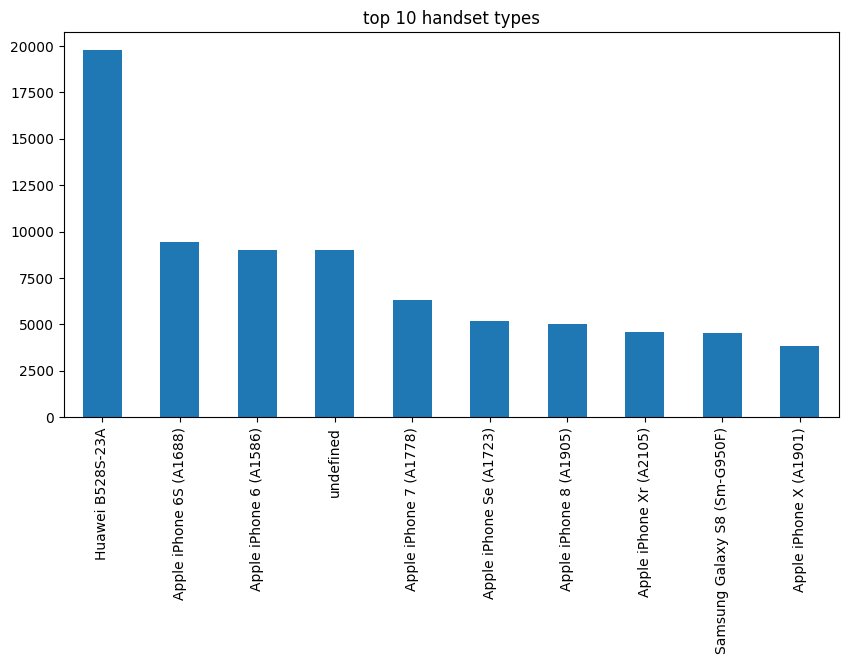

In [5]:
top_10 = cleaned_data["Handset Type"].value_counts()[:10]
plt.figure(figsize=(10,5))
top_10.plot(kind="bar",title="top 10 handset types")
plt.show()

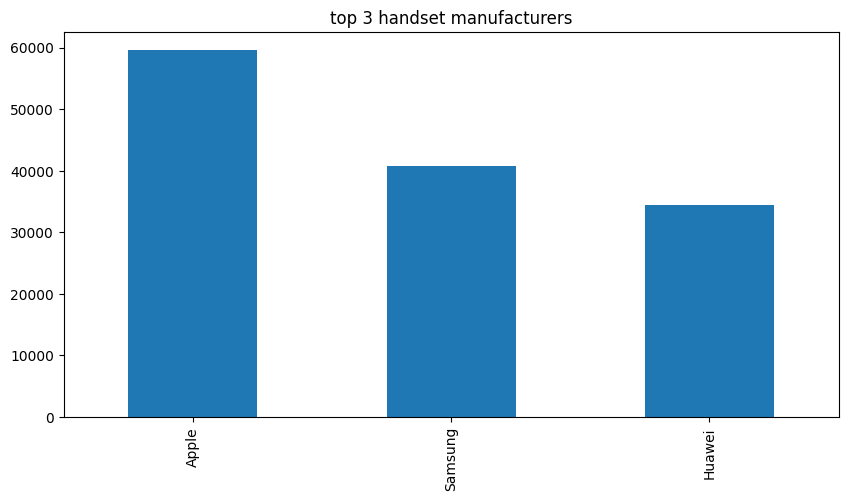

In [6]:
top_3 = cleaned_data["Handset Manufacturer"].value_counts()[:3]
plt.figure(figsize=(10,5))
top_3.plot(kind="bar",title="top 3 handset manufacturers")
plt.show()

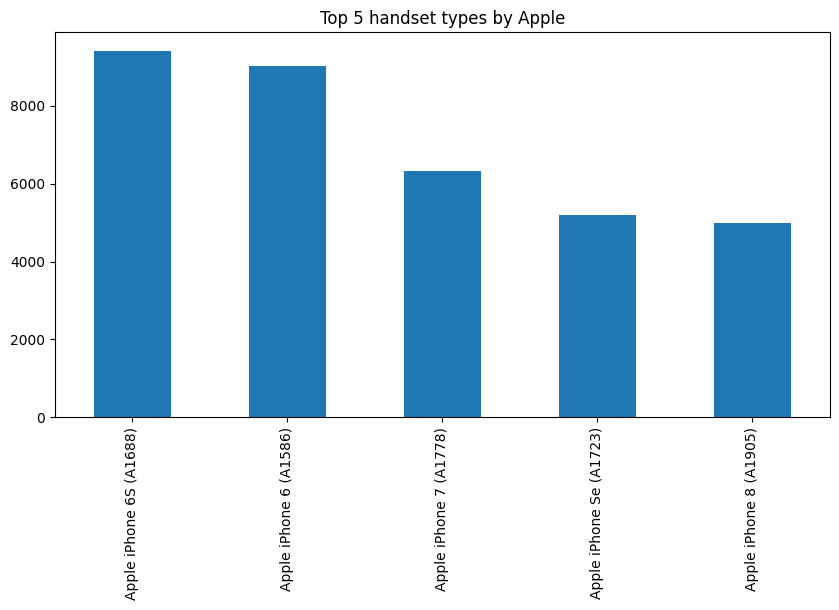

In [7]:
handsets_per_manufacturers=cleaned_data[cleaned_data["Handset Manufacturer"].str.contains("Apple|Samsung|Huawei") ][["Handset Manufacturer","Handset Type"]]
plt.figure(figsize=(10,5))
top_five_apple_handset_type=handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Apple')["Handset Type"].value_counts()[:5]
handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Apple')["Handset Type"].value_counts()[:5].plot(kind='bar', title="Top 5 handset types by Apple")
plt.show()

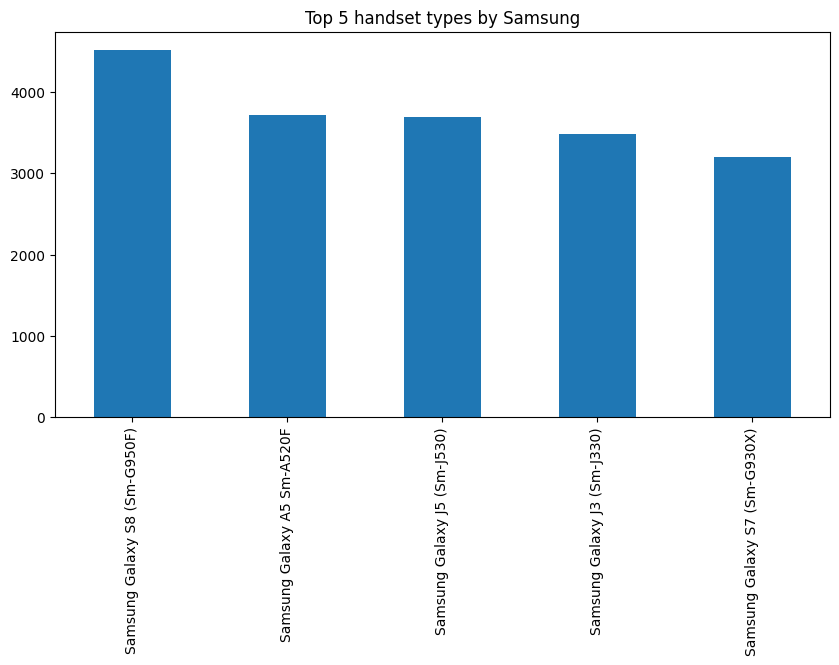

In [8]:
plt.figure(figsize=(10,5))
top_five_samsung_handset_type=handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Samsung')["Handset Type"].value_counts()[:5]
handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Samsung')["Handset Type"].value_counts()[:5].plot(kind='bar', title="Top 5 handset types by Samsung")
plt.show()

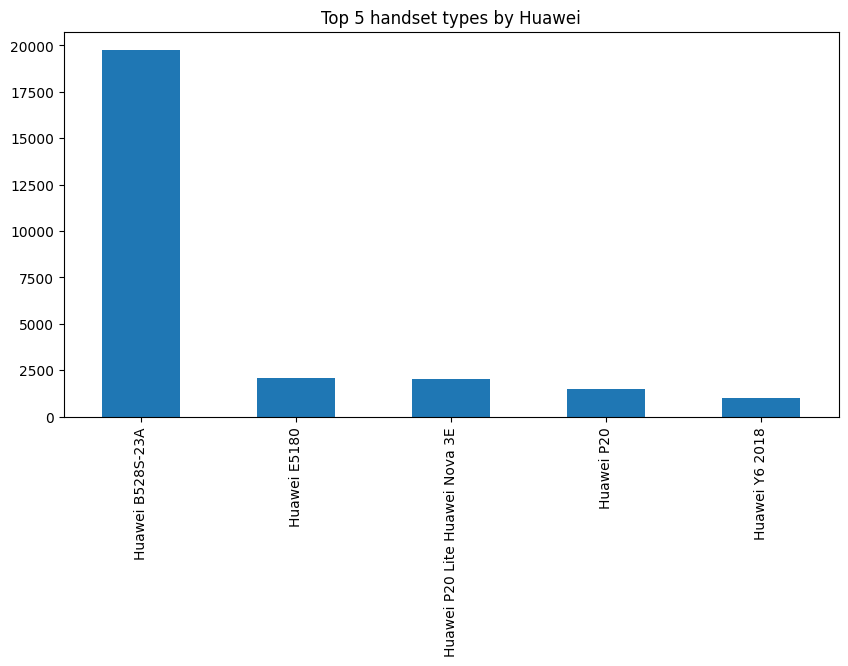

In [9]:
plt.figure(figsize=(10,5))
top_five_huawei_handset_type=handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Huawei')["Handset Type"].value_counts()[:5]
handsets_per_manufacturers.groupby(["Handset Manufacturer"]).get_group('Huawei')["Handset Type"].value_counts()[:5].plot(kind='bar', title="Top 5 handset types by Huawei")
plt.show()

Short interpretation


In [10]:
session=cleaned_data.groupby(["MSISDN/Number"]).agg({"Bearer Id":"count"})

session.rename(columns={"Bearer Id":"xDR_sessions"})
session=pd.DataFrame(data=list(session["Bearer Id"])[1:],columns=["xDR_session"],index=session.index[1:])
session = session.sort_values(by=["xDR_session"],ascending=False)

session.head(10)

,xDR_session
MSISDN/Number,
3.366371e+10,1067
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.376054e+10,15
3.367588e+10,15
3.366716e+10,13
3.360452e+10,12


In [ ]:
duration = cleaned_data.groupby(["MSISDN/Number"]).agg({"Dur. (ms)":"sum"})
duration.sort_values(by=["Dur. (ms)"],ascending=False,inplace=True)
duration=duration.rename(columns={"Dur. (ms)":"total_duration(ms) "})
duration.head(10)

,total_duration(ms)
MSISDN/Number,
3.366371e+10,72655568.0
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
